# Lista de Exercícios 1

#  1a) Prova 2007 - Questão 1 a) 



Seja $x_n$ o valor de $x$ na interação de índice $n$. Temos então que:

$$x_1 = 0.9501$$
$$x_2 = 0.2311$$
$$x_3 = 0.6068$$

In [13]:
x = [0.9501, 0.2311, 0.6068]

Como a PDF tem densidade uniforme, a operação em cada iteração é a própria função $x^3$ somada com as parcelas das iterações anteriores e dividindo pelo  número de parcelas:

In [14]:
y = []
for n in range(1, 4):
    yn = 0
    for i in range(1, n+1):
        yn = yn + x[i-1]**3
    y.append(yn/n)
    print("Resultado da iteração " + str(n) + ": " + str(y[n-1]))
    


Resultado da iteração 1: 0.8576457785009999
Resultado da iteração 2: 0.43499409236599995
Resultado da iteração 3: 0.3644719103879999


Podemos calcular também a aproximação utilizando um número grande de iterações:

In [15]:
import numpy as np

n = 10**6;
x = np.random.rand(n,1);
y = sum(x**3)/n;

print("Resultado da aproximação: " + str(y))
print("Resultado ideal: 0.25")

Resultado da aproximação: [0.24985167]
Resultado ideal: 0.25


#  1b) Prova 2007 - Questão 1 b) 

Com uma densidade exponencial foi utilizada, podemos escrever:

$$\int_0^1x^2e^{-x}dx = \int_0^1x^2f_{x}(x)dx$$

Como o intervalo da integral é de 0 a 1, os valores aleatórios fora desse intervalo serão descartados (nesse caso, o valor de $x_2 = 1.4647$). Assim, temos as seguintes iterações:

In [16]:
x = [0.0512, 1.4647, 0.4995, 0.7216]
y = []
for n in range(1, len(x)+1):
    yn = 0
    for i in range(1, n+1):
        if x[i-1] < 1:
            yn = yn + x[i-1]**2
    y.append(yn/n)
    print("Resultado da iteração " + str(n) + ": " + str(y[n-1]))

Resultado da iteração 1: 0.00262144
Resultado da iteração 2: 0.00131072
Resultado da iteração 3: 0.08404056333333333
Resultado da iteração 4: 0.19320706250000003


Podemos calcular também a aproximação utilizando um número grande de iterações:

In [17]:
n = 10**6;
x = np.random.exponential(1, (n,1));
y = sum(x[x < 1]**2)/n;

print("Resultado da aproximação: " + str(y))
print("Resultado ideal: 0.1607")

Resultado da aproximação: 0.16067307863695204
Resultado ideal: 0.1607


#  2) Prova 2007 - Questão 2

## a)
Fatores de Boltzman:

In [2]:
import numpy as np

def J(x):
    return (x-3)**2

for i in range(1, 6):
    print(np.exp(-J(i)))

0.01831563888873418
0.36787944117144233
1.0
0.36787944117144233
0.01831563888873418


## b)
Temos que a distribuição de Boltzmann é tal que:

$$\Large p_i = \alpha e^{\frac{-J(x)}{kT}}$$

Um algorítimo para gerar essa distribuição é o algorítmimo de Metropolis modificado. As modificações são:

* A função custo é a mesma dada pelo enunciado
* A troca de estado de x depende de um número aleatório discreto que pode valer -1 ou 1
* Os estados são limitados entre 1 e 5

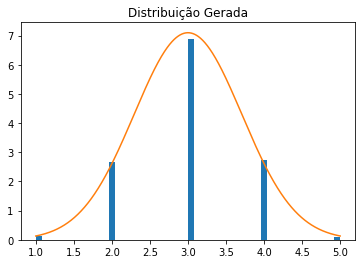

In [35]:
import random
import math
import matplotlib.pyplot as plt

x = 1
xs = []
N = 1e5
k = 1
T = 1

def J(x):
    return (x - 3)**2

for n in range(1, int(N)):
    xhat = x + random.randint(-1, 1)
    if xhat > 5:
        xhat = 1
    elif xhat < 1:
        xhat = 5
        
    dJ = J(xhat) - J(x)
    q = math.exp(-dJ/(k*T))
    r = random.uniform(0, 1)
    
    if r < q:
        x = xhat
    
    if n > N*0.9:
        xs.append(x)

plt.hist(xs, bins=50, density=True)
X = np.linspace(1, 5, num=1000)
plt.plot(X, np.exp(-J(X))*7.1)
plt.title("Distribuição Gerada")
plt.show()

# 03) Lista de Exercícios 1 da CPE723 Edição Presencial - Exercício 3(a)

Podemos utilizar o algorítmo de Metropolis sem modificções. Similar ao programa da questão anterior temos:

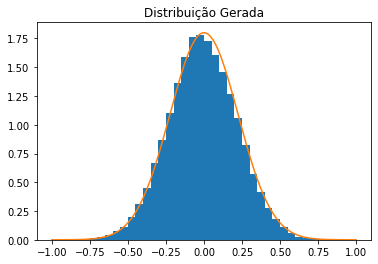

In [20]:
import random
import math
import matplotlib.pyplot as plt

x = 1
xs = []
N = 1e5
eps = 0.1
k = 1
T = 0.1

def J(x):
    return (x)**2

for n in range(1, int(N)):
    xhat = x + eps*random.uniform(-1, 1)
        
    dJ = J(xhat) - J(x)
    q = math.exp(-dJ/(k*T))
    r = random.uniform(0, 1)
    
    if r < q:
        x = xhat
    
    if n > N*0.1:
        xs.append(x)

plt.hist(xs, np.arange(-1, 1, 0.05), density=True)
X = np.linspace(-1, 1, num=1000)
plt.plot(X, np.exp(-J(X)/T)*1.8)
plt.title("Distribuição Gerada")
plt.show()

# 04) Prova de 2008 - Questão 1

A densidade de probabilidade $P$ gerada pelo algorítmo de metropolis é tal que:

$$\large P = \alpha e^{-J(x)/T}$$

Queremos que:

$$\large f_{X}(x) = \alpha e^{-J(x)/T}$$

Logo:

$$\large \ln (f_{X}(x)) = \ln(\alpha) -J(x)/T$$

$$\large J(x) = -T\ln (f_{X}(x)) -T\ln(\alpha)$$

Como o algorítmo utiliza uma diferença de valores de $J(x)$ ($\delta J(x)$) podemos remover o termo constante:

$$\large J(x) = -T\ln(f_{X}(x))$$

A seguir, o algorítimo de Metropolis em questão que gera uma densidade de probabilidade arbitrária fX(x):

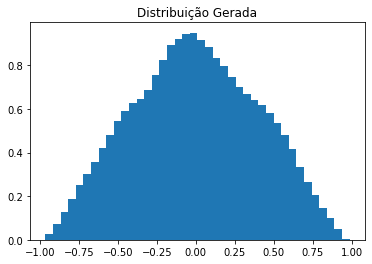

In [76]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np

x = random.uniform(0, 1)
xs = []
N = 1e5
eps = 0.05
k = 1
T = 1

def fX(x):
    return max(0, 1- abs(x))

def J(x):
    if (fX(x) == 0):
        return np.inf
    return -T*np.log(fX(x))

for n in range(1, int(N)):
    xhat = x + eps*(random.randint(0, 1)*2 -1)
        
    dJ = J(xhat) - J(x)
    q = np.exp(-dJ/(k*T))
    r = random.uniform(0, 1)
    
    if r < q:
        x = xhat
    
    if n > N*0.1:
        xs.append(x)

plt.hist(xs,bins=40, density=True)
plt.title("Distribuição Gerada")
plt.show()

# 5) Prova de 2011 - Questão 1

Como a integral só apresenta termos $x_1$ e $x_2$, para que a integral seja calculada, basta calcular as integrais intermediárias em um intervalo $0 \leq x_n < 1$ e multiplicar o resultado final por 2. A integral pode ser calculada pelo método de Monte Carlo, que por sua vez, permite calcular o valor experado de uma dada deinsidade de probabilidades $f_{X}(x)$. Podemos então escolher $f_{X}(x)$ tal que:

$$\large f_{X_1, X_2} = e^{-(x_1^2 + x_2^2)}$$



10
20
30
40
50
60
70
80
90


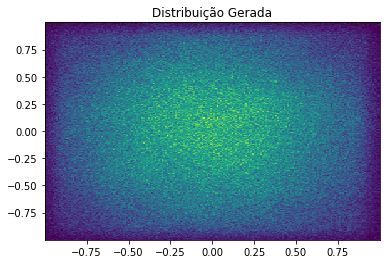

Resultado da aproximação: 1.0574611741508235
Resultado esperado: 1.1320


In [119]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

x = [random.uniform(0, 1), random.uniform(0, 1)]
xhat = [0, 0]
Fhat = 0
correcao = 0
N = 1e7
M = int(0.1*N) + 1
xs1 = np.zeros([M, 1])
xs2 = np.zeros([M, 1])
e = 0.1
T = 1
Jx = 0
Jxhat = 0
k = 0

j = 0

# Metropolis

def J(x):
    return x[0]**2 + x[1]**2

for n in range(0, int(N)): 
    for i in range(0, 2):
        incremento = e*random.uniform(-1, 1)
        xhat[i] = x[i] + incremento

        if xhat[i] > 1 or xhat[i] < -1:
            xhat[i] -= 2*incremento
    Jxhat = J(xhat)
        
    dJ = Jxhat - Jx
    
    q = np.exp(-dJ/(T))
    r = random.uniform(0, 1)
    
    if r < q:
        x = list(xhat)
        Jx = Jxhat
    
    j += 1
    if(j > N/10):
        j = 0
        k+=1
        print(k*10)
    
    if n > (N - M):
        xs1[j] = x[0]
        xs2[j] = x[1]
       
        Fhat += Jx
        correcao += np.exp(-J([np.random.uniform(-1,1),np.random.uniform(-1,1)]))
        
plt.hist2d(np.asarray(xs1)[:,0], np.asarray(xs2)[:,0], bins = 200)
plt.title("Distribuição Gerada")
plt.show()

correcao = correcao/M

Fhat = Fhat/M

y = 4*Fhat*correcao

print("Resultado da aproximação: " + str(y))
print("Resultado esperado: 1.1320")

# 06) Prova de 2012 - Itens 1(a), 1(b) e 1(c)

## a)

Podemos utilizar um algorítmo de metropolis que altera uma das coordenadas de um dos estados aleatoriamente:

In [15]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

x = np.zeros((5,2))
xhat = np.zeros((5,2))
N = 1e5
M = int(0.1*N) + 1
xs = np.zeros((M, 5, 2))
e = 0.1
T = 1
F = 0

# Metropolis

def J(x):
    Ja = np.sum((x[:, 0]**2 + x[:, 1]**2)**2)
    Jb = 0
    
    for i in range(0, len(x)):
        for j in range(0, len(x)):
            if(i != j):
                z = x[i, :] - x[j, :]
                Jb += 1/((z[0]**2 + z[1]**2)**2)
    return Ja + Jb

for n in range(0, int(N)): 
    i = [random.randint(0, 4), random.randint(0, 1)]
    xhat[i[0], i[1]] = x[i[0], i[1]] + e*random.uniform(-1, 1)
        
    dJ = J(xhat) - J(x)
    
    q = np.exp(-dJ/(T))
    r = random.uniform(0, 1)
    
    if r < q:
        x = xhat
            
    
    if n > (N - M):
        xs[int(n - (N - M) - 1), :, :] = x
        F += J(x)
F = F/M
print(xs)

<ipython-input-15-cda719be930f>:25: RuntimeWarning: divide by zero encountered in double_scalars
  Jb += 1/((z[0]**2 + z[1]**2)**2)
<ipython-input-15-cda719be930f>:32: RuntimeWarning: invalid value encountered in double_scalars
  dJ = J(xhat) - J(x)


[[[-1.27444651 -0.52464302]
  [-4.770564   -6.43213075]
  [-3.30597323  1.43030323]
  [-7.55231238  5.38988897]
  [-3.00957786  4.2012763 ]]

 [[-1.27444651 -0.52464302]
  [-4.770564   -6.43213075]
  [-3.30597323  1.43030323]
  [-7.55231238  5.38988897]
  [-3.00957786  4.10522635]]

 [[-1.27444651 -0.52464302]
  [-4.81812115 -6.43213075]
  [-3.30597323  1.43030323]
  [-7.55231238  5.38988897]
  [-3.00957786  4.10522635]]

 ...

 [[ 0.20364131  0.48976433]
  [-2.98149851 -3.36016631]
  [-1.59605827 -1.18853243]
  [-7.1181023   5.66703642]
  [-2.63280075  2.96239354]]

 [[ 0.20364131  0.48976433]
  [-2.98149851 -3.36016631]
  [-1.59605827 -1.18853243]
  [-7.1181023   5.66703642]
  [-2.63280075  3.05664752]]

 [[ 0.          0.        ]
  [ 0.          0.        ]
  [ 0.          0.        ]
  [ 0.          0.        ]
  [ 0.          0.        ]]]


## b)

Para cada caso, temos os seguintes valores de energia:

$$J_1(r=1.1291) = 4r^2 + \frac{6.5}{r^2} = 10.198$$
$$J_2(r=1) = 5r^2 + \frac{5}{r^2} = 10$$

A proporção $P$ será:

$$\large P = e^{\frac{J_2(r=1) - J_1(r=1.1291)}{T}} = 0.82$$

# c)

A modificação será na soma feita nas últimas iterações do algorítimo.

In [118]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

x = np.zeros((5,2))
xhat = np.zeros((5,2))
N = 1e5
M = int(0.1*N) + 1
xs = np.zeros((M, 5, 2))
e = 0.1
T = 1
F = 0

# Metropolis

def L(x):
    return 1/5*np.sum((x[:, 0]**2 + x[:, 1]**2))

def J(x):
    Ja = np.sum((x[:, 0]**2 + x[:, 1]**2)**2)
    Jb = 0
    
    for i in range(0, len(x)):
        for j in range(0, len(x)):
            if(i != j):
                z = x[i, :] - x[j, :]
                Jb += 1/((z[0]**2 + z[1]**2)**2)
    return Ja + Jb

for n in range(0, int(N)): 
    i = [random.randint(0, 4), random.randint(0, 1)]
    xhat[i[0], i[1]] = x[i[0], i[1]] + e*random.uniform(-1, 1)
        
    dJ = J(xhat) - J(x)
    
    q = np.exp(-dJ/(T))
    r = random.uniform(0, 1)
    
    if r < q:
        x = xhat
            
    
    if n > (N - M):
        xs[int(n - (N - M) - 1), :, :] = x
        F += L(x) #Modificação
F = F/M
print(xs)

<ipython-input-118-bc118629f13d>:28: RuntimeWarning: divide by zero encountered in double_scalars
  Jb += 1/((z[0]**2 + z[1]**2)**2)
<ipython-input-118-bc118629f13d>:35: RuntimeWarning: invalid value encountered in double_scalars
  dJ = J(xhat) - J(x)


[[[ -9.2732151    0.14898338]
  [-10.61635047   1.3529847 ]
  [  0.03194715   9.17516264]
  [  0.94428777   4.75936   ]
  [ -0.8909165   -0.53913213]]

 [[ -9.2732151    0.14898338]
  [-10.61635047   1.3529847 ]
  [  0.03194715   9.12518871]
  [  0.94428777   4.75936   ]
  [ -0.8909165   -0.53913213]]

 [[ -9.2732151    0.14898338]
  [-10.61635047   1.3529847 ]
  [  0.03194715   9.12518871]
  [  0.94428777   4.75936   ]
  [ -0.8909165   -0.57272003]]

 ...

 [[ -9.83812211  -0.73667624]
  [-12.94827563   0.57037377]
  [ -0.61615692   8.13549203]
  [  2.21339402   2.76712963]
  [ -2.68504872  -1.6274446 ]]

 [[ -9.83812211  -0.73667624]
  [-12.94827563   0.57037377]
  [ -0.61615692   8.13549203]
  [  2.21339402   2.71574047]
  [ -2.68504872  -1.6274446 ]]

 [[  0.           0.        ]
  [  0.           0.        ]
  [  0.           0.        ]
  [  0.           0.        ]
  [  0.           0.        ]]]


# 07) Lista de Exercícios 1 da CPE723 Edição Presencial - Exercício 4(a) (de novo, não é preciso fazer o item (b), cálculo manual com 10 valores)

<ipython-input-1-a2802bc90b04>:36: RuntimeWarning: overflow encountered in exp
  q = np.exp((Jatual-Jit)/T)


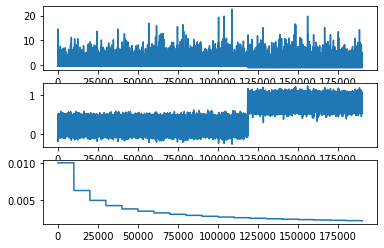

J minimo encontrado:  -0.8066495357673962  ideal: -0.8066
X minimo encontrado:  0.8130288352030725 ideal: 0.8130


In [1]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

x = 0
xhat = 0
N = 1e4
M = int(0.1*N) + 1
xmin = x
Xs = []
Jatual = 1e6
Jmin = Jatual
Js = []
n = 0

e = 1e-1
T0 = 1e-2
T = T0
Ts = []
Kmax = 20
k = 1

# SA

def J(x):
    return -x + 100*(x - 0.2)**2*(x - 0.8)**2

while k < Kmax:
    n += 1
    
    xhat = x + e*random.gauss(0, 1)
        
    Jit = J(xhat)
    
    q = np.exp((Jatual-Jit)/T)
    r = random.uniform(0, 1)
    
    if r < q:
        x = xhat
        Jatual = Jit
        
    
    if Jit < Jmin:
        Jmin = Jit
        xmin = xhat   
             
    if n % N == 0:
        k += 1
        T = T0/(np.log2(1 + k))

    Js.append(Jit)
    Ts.append(T)
    Xs.append(xhat)

fig, axs = plt.subplots(3)
axs[0].plot(Js)
axs[1].plot(Xs)
axs[2].plot(Ts)
plt.show()
print("J minimo encontrado: ", Jmin, " ideal: -0.8066")
print("X minimo encontrado: ", xmin, "ideal: 0.8130")

# 08) Lista de Exercícios 1 da CPE723 Edição Presencial - Exercício 5

Função proposta:

$$J(x, y, z) = (5-x)^2*(y + 15)^2*(z - 10)^2$$

<ipython-input-14-b91200764782>:38: RuntimeWarning: overflow encountered in exp
  q = np.exp((Jatual-Jit)/T)


10.0
15.0
20.0
25.0
30.0
35.0
40.0
45.0
50.0
55.00000000000001
60.0
65.0
70.0
75.0
80.0
85.0
90.0
95.0
100.0


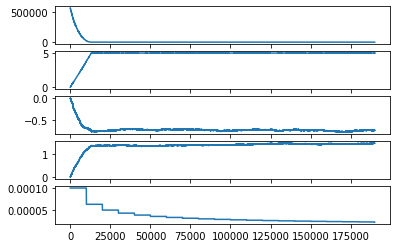

J minimo encontrado:  [2.22318865e-12]
Estados minimos encontrados:  [[ 5.00000001]
 [-0.75990888]
 [ 1.37981117]]


In [14]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

x = np.zeros((3, 1))
xhat = np.zeros((3, 1))
N = 1e4
M = int(0.1*N) + 1
xmin = x
Xs = []
Ys = []
Zs = []
Jatual = 1e6
Jmin = Jatual
Js = []
n = 0

e = 1e-3
T0 = 1e-4
T = T0
Ts = []
Kmax = 20
k = 1

# SA

def J(x):
    return (5 - x[0])**2*(x[1]+15)**2*(x[2] - 10)**2

while k < Kmax:
    n += 1
    
    xhat = x + e*np.random.normal(0, 1, (3,1))
        
    Jit = J(xhat)
    
    q = np.exp((Jatual-Jit)/T)
    r = random.uniform(0, 1)
    
    if r < q:
        x = xhat
        Jatual = Jit
        
    
    if Jit < Jmin:
        Jmin = Jit
        xmin = xhat   
             
    if n % N == 0:
        k += 1
        print(k/Kmax*100)
        T = T0/(np.log2(1 + k))

    Js.append(Jit)
    Ts.append(T)
    Xs.append(xhat[0])
    Ys.append(xhat[1])
    Zs.append(xhat[2])

fig, axs = plt.subplots(5)
axs[0].plot(Js)
axs[1].plot(Xs)
axs[2].plot(Ys)
axs[3].plot(Zs)
axs[4].plot(Ts)
plt.show()
print("J minimo encontrado: ", Jmin)
print("Estados minimos encontrados: ", xmin)

# 09) Prova de 2008 - Questão 3

<ipython-input-16-9678425a80b1>:56: RuntimeWarning: overflow encountered in exp
  q = np.exp((Jatual-Jit)/T)


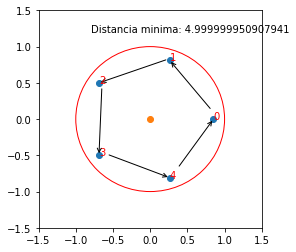

In [16]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

ordem = np.arange(5)
np.random.shuffle(ordem[1:])
ordemHat = ordem
x = []

raioPentagono = 0.8506508

for i in range(0, 5):
    x.append([raioPentagono*np.cos(i*2*np.pi/5), raioPentagono*np.sin(i*2*np.pi/5)])

x = np.array(x)

N = 1e4
M = int(0.1*N) + 1
ordemMin = ordem
Jatual = 1e6
Jmin = Jatual
Js = []
n = 0

T0 = 1e-2
T = T0
Ts = []
Kmax = 20
distancias = []
k = 1

# SA

def J(ordem):
    distTot = 0
    for i in ordem[1:]:
        dist = np.linalg.norm(x[i]-x[i-1])
        distTot += dist
        
    dist = np.linalg.norm(x[i]-x[0])
    distTot += dist
    
    return distTot
    
while k < Kmax:
    n += 1
    
    idx = random.randint(1, 4)
    idx2 = random.randint(1, 4)
    
    ordemHat[idx], ordemHat[idx2] = ordem[idx2], ordem[idx]
            
    Jit = J(ordemHat)
    
    q = np.exp((Jatual-Jit)/T)
    r = random.uniform(0, 1)
    
    if r < q:
        ordem = ordemHat
        Jatual = Jit
        
    
    if Jit < Jmin:
        Jmin = Jit
        ordemMin = ordemHat   
             
    if n % N == 0:
        k += 1
#         print(k/Kmax*100)
        T = T0/(np.log2(1 + k))

    distancias.append(Jit)

fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(x[:,0], x[:,1])
ax.scatter(0, 0)
ax.add_patch(plt.Circle((0, 0), 1, color='r', fill=False))
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])


for i in ordemMin[1:]:
    plt.annotate(text=str(i-1), xy=(x[i]), xytext=(x[i-1]), color='r', arrowprops=dict(arrowstyle='->'))

plt.annotate(text=str(4), xy=(x[0]), xytext=(x[4]), color='r', arrowprops=dict(arrowstyle='->'))
plt.annotate(text="Distancia minima: " + str(Jmin), xy=(-0.8,1.2), xytext=(-0.8,1.2))

plt.show()